# KMeans Clustering Assignment

In [1]:
#1. K-Means Clustering:
#- Load customer data.
#- Check the number of cells in each column with null values.
#- Create a scatter plot with Age as X and Spending Score as Y.
#- Draw a scatter plot displaying data points colored on the basis of clusters.

In [2]:
import pandas as pd

In [3]:
customersdf = pd.read_csv(r"H:\Intellipaat data science\Python\Python for Data Science\Module 9\Assignment 1 - K Means Suboptimal\customers.csv")

In [4]:
customersdf.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [5]:
customersdf.isnull()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,False,False,False,False,False
1,False,False,False,False,False
2,False,False,False,False,False
3,False,False,False,False,False
4,False,False,False,False,False
...,...,...,...,...,...
195,False,False,False,False,False
196,False,False,False,False,False
197,False,False,False,False,False
198,False,False,False,False,False


In [6]:
print(customersdf.isnull().sum())

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64


In [7]:
#There seem to be no null values in the df

In [8]:
import matplotlib.pyplot as plt

In [9]:
customersdf.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [10]:
customersdf_rename = customersdf.rename(columns={'Spending Score (1-100)': 'SpendingScore'}, inplace= False)

In [11]:
customersdf_rename.head()

,CustomerID,Gender,Age,Annual Income (k$),SpendingScore
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


Text(0.5, 1.0, 'Age Vs SpendingScore')

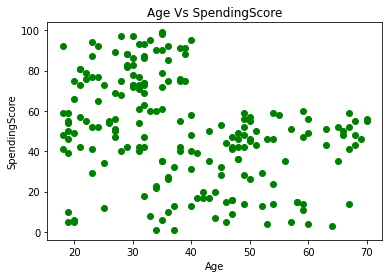

In [12]:
plt.scatter(x=customersdf_rename ['Age'], y=customersdf_rename ['SpendingScore'], color='green')
plt.xlabel('Age')
plt.ylabel('SpendingScore')
plt.title('Age Vs SpendingScore')

In [13]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

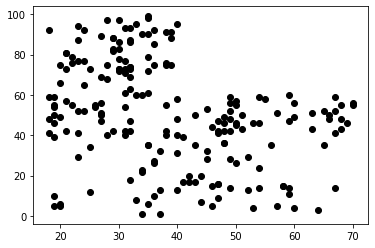

In [14]:
f1 = customersdf_rename['Age'].values
f2 = customersdf_rename['SpendingScore'].values

x = np.array(list(zip(f1,f2)))
plt.scatter(f1,f2, c='black') 

In [15]:
x

array([[19, 39],
       [21, 81],
       [20,  6],
       [23, 77],
       [31, 40],
       [22, 76],
       [35,  6],
       [23, 94],
       [64,  3],
       [30, 72],
       [67, 14],
       [35, 99],
       [58, 15],
       [24, 77],
       [37, 13],
       [22, 79],
       [35, 35],
       [20, 66],
       [52, 29],
       [35, 98],
       [35, 35],
       [25, 73],
       [46,  5],
       [31, 73],
       [54, 14],
       [29, 82],
       [45, 32],
       [35, 61],
       [40, 31],
       [23, 87],
       [60,  4],
       [21, 73],
       [53,  4],
       [18, 92],
       [49, 14],
       [21, 81],
       [42, 17],
       [30, 73],
       [36, 26],
       [20, 75],
       [65, 35],
       [24, 92],
       [48, 36],
       [31, 61],
       [49, 28],
       [24, 65],
       [50, 55],
       [27, 47],
       [29, 42],
       [31, 42],
       [49, 52],
       [33, 60],
       [31, 54],
       [59, 60],
       [50, 45],
       [47, 41],
       [51, 50],
       [69, 46],
       [27, 51

In [16]:
def dist(a,b, ax=1):
    return np.linalg.norm(a - b , axis = ax)

NameError: name 'C_x' is not defined

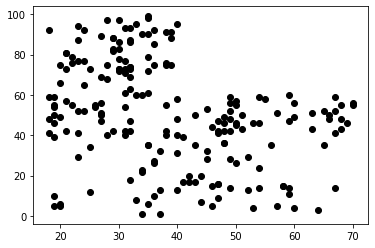

In [17]:
plt.scatter(f1,f2, c='black')
plt.scatter(C_x, C_y, marker = '*', s=200, c='b')

In [19]:
k = 3
C_x = np.random.randint(0, np.max(x)-20, size=k)
C_y = np.random.randint(0, np.max(x)-20, size=k)

C = np.array(list(zip(C_x, C_y)), dtype = np.float32)
C

array([[16., 16.],
       [66., 22.],
       [60., 70.]], dtype=float32)

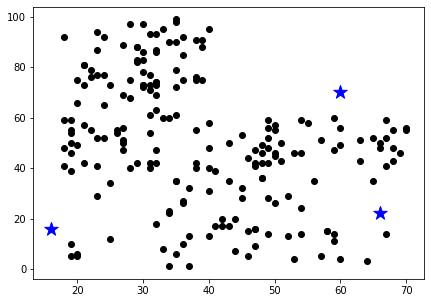

In [20]:
plt.scatter(f1,f2, c='black')
plt.scatter(C_x, C_y, marker = '*', s=200, c='b')

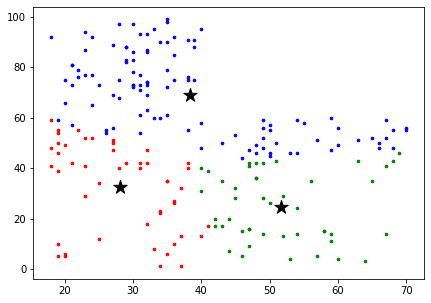

In [21]:
plt.rcParams['figure.figsize'] = (7,5)
C_old = np.zeros(C.shape)
Clusters  = np.zeros(len(x))
error = dist(C, C_old, None)

while error != 0:
    for i in range(len(x)):
        distanCes = dist(x[i], C)
        Cluster = np.argmin(distanCes)
        Clusters[i] = Cluster
        
    C_old = C
    
    for i in range(k):
        points = [x[j] for j in range(len(x)) if Clusters[j] == i]
        C[i] = np.mean(points, axis = 0)
        error = dist(C, C_old, None)
        
Colors = ['r','g','b','y','C','m']
fif, ax =  plt.subplots()

for i in range(k):
    points = np.array([x[j] for j in range(len(x))  if Clusters[j] == i])
    ax.scatter(points[:, 0], points[:, 1], s = 7, c= Colors[i])
ax.scatter(C[:, 0], C[:, 1], marker = '*', s= 200, c= '#050505')

# END OF ASSIGNMENT 